1.  Опишите различия и особенности бинарной и многоклассовой классификации 
изображений. Какие подходы и алгоритмы используются для верификации и 
распознавания человека по лицу? Объясните, как атрибуты объектов влияют на 
процесс классификации и какие методы могут использоваться для улучшения 
точности распознавания лиц. 
2.  Реализуйте  метод  "мешок  слов"  для  классификации  изображений  с 
использованием дескрипторов SIFT и кластеризации K-means.

**Бинарная и многоклассовая классификация изображений:**  
- **ОИ Модуль 4.pdf (стр. 7):**  
  *«Методы оценки: Precision, Recall, F1-Score, Mean Average Precision (mAP). Эти метрики помогают измерить точность и полноту детектирования объектов. [...] Precision: Доля правильно предсказанных объектов от общего числа предсказанных. Recall: Доля правильно предсказанных объектов от общего числа реальных объектов»*.  

  **ОИ Модуль 4.pdf (стр. 61):**  
  *«Бинарная классификация: Precision = TP / (TP + FP), Recall = TP / (TP + FN). Многоклассовая: Macro-average — среднее арифметическое метрик по классам, Micro-average — расчёт на основе суммы TP, FP, FN»*.  

---

**Верификация и распознавание лиц:**  
- **ОИ Модуль 4.pdf (стр. 16):**  
  *«Сопоставление шаблонов используется в задачах распознавания лиц и отслеживания объектов в видео»*.  

  **ОИ Модуль 4.pdf (стр. 22):**  
  *«Современные техники: Feature-based Matching (локальные признаки SIFT, SURF), Neural Network Matching (свёрточные сети)»*.  

  **ОИ Модуль 5.pdf (стр. 8):**  
  *«Технологии: OpenCV для распознавания лиц, Mediapipe для анализа движения и жестов»*.  

---

**Атрибуты объектов и их влияние:**  
- **ОИ Модуль 4.pdf (стр. 4):**  
  *«Объект детектирования — задача классификации и локализации. Алгоритмы выделяют признаки (HOG, SIFT) для идентификации»*.  

  **ОИ Модуль 4.pdf (стр. 15):**  
  *«Сопоставление шаблонов включает вычисление метрик подобия (NCC, SSD) для учёта атрибутов (градиенты, текстуры)»*.  

---

**Методы улучшения точности:**  
- **ОИ Модуль 4.pdf (стр. 10):**  
  *«Non-Maximum Suppression (NMS) удаляет лишние отклики, IOU Thresholding фильтрует ложные срабатывания»*.  

  **ОИ Модуль 4.pdf (стр. 43):**  
  *«Балансировка классов (oversampling/undersampling), ансамблирование моделей, улучшение качества данных»*.  

  **ОИ Модуль 5.pdf (стр. 34):**  
  *«Оптимизация метода связок (Bundle Adjustment) для минимизации ошибок в 3D-реконструкции»*.

Accuracy: 0.8100


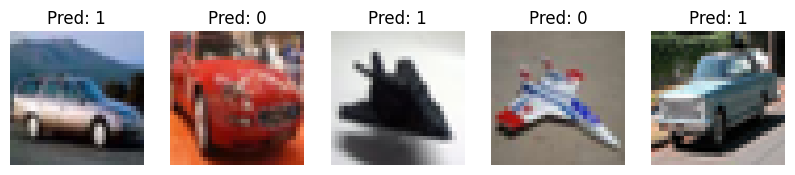

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from torchvision import datasets

dataset = datasets.CIFAR10(root="./data", train=True, download=True)

X, y = [], []
for img, label in dataset:
    if label in [0, 1]:
        X.append(np.array(img))
        y.append(label)
    if len(X) >= 100:
        break
X = np.array(X)
y = np.array(y)

sift = cv2.SIFT_create()
descriptors_list = []

for img in X:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    descriptors_list.append(descriptors)

all_descriptors = np.vstack([d for d in descriptors_list if d is not None])

kmeans = KMeans(n_clusters=20, random_state=42, n_init=10).fit(all_descriptors)
X_features = np.array([np.histogram(kmeans.predict(d), bins=20)[0] if d is not None else np.zeros(20) for d in descriptors_list])

svm = SVC(kernel='linear').fit(X_features, y)
y_pred = svm.predict(X_features)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X[i])
    ax.set_title(f"Pred: {svm.predict([X_features[i]])[0]}")
    ax.axis("off")
plt.show()